In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.layers import Input
%matplotlib inline

In [7]:
# 전처리 데이터
final = pd.read_csv('/kaggle/input/korea-apartment-transaction-data-set/df_final_final.csv')

In [8]:
final.shape, final.columns

((1237424, 27),
 Index(['city', 'gu_num', 'dong_num', 'apt_id', 'size_rs', 'floor', 'price',
        'year', 'age', 'exercise_f', 'entertain_f', 'park_mean_rs',
        'park_sum_rs', 'benefit_f', 'cult_f', 'other_f', 'park_n', '어린이집유형_가정',
        '어린이집유형_국공립', '어린이집유형_민간', '어린이집유형_법인·단체', '어린이집유형_사회복지법인', '어린이집유형_직장',
        '어린이집유형_협동', 'baby_num_rs', 'CCTV_num_rs', 'commuting_rs'],
       dtype='object'))

In [9]:
final['price']

0           37500
1           20000
2           38500
3          118000
4          120000
            ...  
1237419     22000
1237420     30750
1237421     29500
1237422     26700
1237423     28800
Name: price, Length: 1237424, dtype: int64

In [11]:
# 라벨 데이터 분리 및 불필요한 컬럼 제거
X = final.drop(['price'], axis = 1)
Y = final['price']

In [12]:
# 학습 데이터와 평가 데이터로 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y) # default 0.25%

# 훈련 시작 

In [14]:
import time

# 모델 훈련 기본
model_dense = keras.Sequential([
        Input(shape=(Train_X.shape[1],)), 
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1)
    ])

model_dense.compile(optimizer="rmsprop",
              loss="mae",
              metrics=["mae"])

# 훈련 시작 시간 기록
start_time = time.time()

# 모델 훈련
history = model_dense.fit(Train_X, 
                          Train_Y,
                          epochs=10,
                          batch_size=64,
                          validation_data=(Test_X, Test_Y)
                         )
# 훈련 종료 시간 기록
end_time = time.time()

# 훈련 시간 계산 및 출력
elapsed_time = end_time - start_time
print(f"모델 훈련 시간: {elapsed_time:.2f}초")



Epoch 1/10
   95/14502 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.0000e+00 - loss: 27960.8750 - mae: 27960.8750 

I0000 00:00:1719361792.980076     158 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719361792.994352     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14502/14502 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 15186.0859 - mae: 15186.0859

W0000 00:00:1719361816.621523     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14502/14502 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.0000e+00 - loss: 15185.8760 - mae: 15185.8760 - val_accuracy: 0.0000e+00 - val_loss: 11241.2617 - val_mae: 11241.2617
Epoch 2/10
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.0000e+00 - loss: 9275.1875 - mae: 9275.1875 - val_accuracy: 0.0000e+00 - val_loss: 14656.4805 - val_mae: 14656.4805
Epoch 3/10
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.0000e+00 - loss: 8368.9590 - mae: 8368.9590 - val_accuracy: 0.0000e+00 - val_loss: 8326.7295 - val_mae: 8326.7295
Epoch 4/10
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.0000e+00 - loss: 7858.3301 - mae: 7858.3301 - val_accuracy: 0.0000e+00 - val_loss: 8645.9258 - val_mae: 8645.9258
Epoch 5/10
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.0000e+00 - loss: 7497.8286 - mae: 7497.8286 - val_accuracy: 0.0000e+00 - val_loss: 7903.4277 - val_mae: 7903.4277
Epoch 6/10
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.0000e+00 

In [15]:
prediction = model_dense.predict(Test_X)

9668/9668 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


In [17]:
history.history

{'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'loss': [12134.888671875,
  8986.4404296875,
  8225.1484375,
  7755.5458984375,
  7406.25830078125,
  7144.0576171875,
  6934.0556640625,
  6768.54248046875,
  6615.373046875,
  6493.08935546875],
 'mae': [12134.888671875,
  8986.4404296875,
  8225.1484375,
  7755.5458984375,
  7406.25830078125,
  7144.0576171875,
  6934.0556640625,
  6768.54248046875,
  6615.373046875,
  6493.08935546875],
 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_loss': [11241.26171875,
  14656.48046875,
  8326.7294921875,
  8645.92578125,
  7903.427734375,
  7659.693359375,
  9170.0087890625,
  6759.72021484375,
  6546.0078125,
  11371.76953125],
 'val_mae': [11241.26171875,
  14656.48046875,
  8326.7294921875,
  8645.92578125,
  7903.427734375,
  7659.693359375,
  9170.0087890625,
  6759.72021484375,
  6546.0078125,
  11371.76953125]}

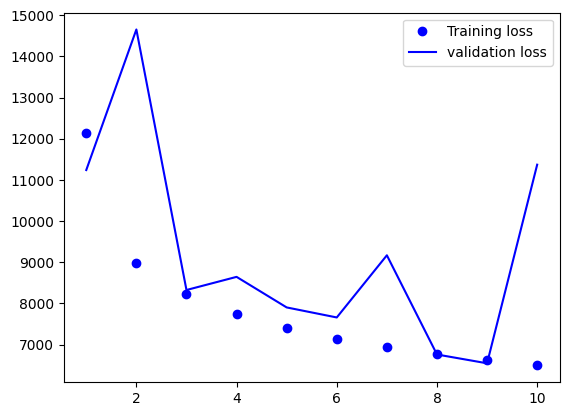

In [16]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1 )
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.legend()
plt.show()

In [38]:
prediction, Test_Y.max(), Train_Y.max()

(array([[19990.639],
        [92745.19 ],
        [21025.496],
        ...,
        [51778.82 ],
        [27221.559],
        [21021.398]], dtype=float32),
 780000,
 820000)

In [66]:
# 눈으로 확인
iter = 0
error_sum = 0
for value in Test_Y:
    
    # 에러가 음수 일 경우 양수로 변경
    error = prediction[iter] - value
    if error < 0:
        error = error * -1
    
    # 예측 값, 정답, 오차 출력
    print(f" {iter + 1:<3} 예측: {prediction[iter][0]/10000:<5.2f}억,   정답: {value/10000:<5.2f}억,   오차: {error[0]/10000:.2f}억")

    # 에러 합계 구하기
    error_sum += error
    
    # 1증가
    iter += 1
    
    # 50에 멈추고, 에러 평균 출력
    if iter == 50:
        
        print(f'에러 평균: {error_sum[0]/50/10000:.2f}억원')
        break

 1   예측: 2.00 억,   정답: 1.89 억,   오차: 0.11억
 2   예측: 9.27 억,   정답: 6.63 억,   오차: 2.64억
 3   예측: 2.10 억,   정답: 1.80 억,   오차: 0.30억
 4   예측: 1.72 억,   정답: 1.40 억,   오차: 0.32억
 5   예측: 6.28 억,   정답: 4.67 억,   오차: 1.61억
 6   예측: 8.13 억,   정답: 6.40 억,   오차: 1.73억
 7   예측: 3.74 억,   정답: 2.35 억,   오차: 1.39억
 8   예측: 6.46 억,   정답: 4.25 억,   오차: 2.21억
 9   예측: 4.49 억,   정답: 3.97 억,   오차: 0.52억
 10  예측: 9.42 억,   정답: 9.00 억,   오차: 0.42억
 11  예측: 0.83 억,   정답: 0.68 억,   오차: 0.15억
 12  예측: 7.78 억,   정답: 5.95 억,   오차: 1.83억
 13  예측: 4.61 억,   정답: 2.89 억,   오차: 1.72억
 14  예측: 6.45 억,   정답: 4.20 억,   오차: 2.25억
 15  예측: 2.29 억,   정답: 2.09 억,   오차: 0.20억
 16  예측: 4.45 억,   정답: 3.60 억,   오차: 0.85억
 17  예측: 1.86 억,   정답: 1.53 억,   오차: 0.33억
 18  예측: 11.24억,   정답: 13.22억,   오차: 1.98억
 19  예측: 11.57억,   정답: 7.10 억,   오차: 4.47억
 20  예측: 3.19 억,   정답: 1.83 억,   오차: 1.36억
 21  예측: 6.98 억,   정답: 4.10 억,   오차: 2.88억
 22  예측: 1.50 억,   정답: 0.90 억,   오차: 0.60억
 23  예측: 2.69 억,   정답: 2.75 억,   오차: 0.06억
 24  예측: 4.

In [67]:
# 모델 훈련

model_dense = keras.Sequential([
    Input(shape=(Train_X.shape[1],)), 
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1)
])

model_dense.compile(optimizer="rmsprop",
              loss="mae",
              metrics=["mae"])
# 훈련 시작 시간 기록
start_time = time.time()
history = model_dense.fit(Train_X, 
                          Train_Y,
                          epochs=30,
                          batch_size=64,
                          validation_data=(Test_X, Test_Y)
                         )
# 훈련 종료 시간 기록
end_time = time.time()

# 훈련 시간 계산 및 출력
elapsed_time = end_time - start_time
print(f"모델 훈련 시간: {elapsed_time:.2f}초")


Epoch 1/30
  103/14502 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 24642.1016 - mae: 24642.1016

W0000 00:00:1719363541.582618     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14502/14502 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 13727.0020 - mae: 13727.0020 - val_loss: 9273.7939 - val_mae: 9273.7939
Epoch 2/30
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 8877.5088 - mae: 8877.5088 - val_loss: 8010.9243 - val_mae: 8010.9243
Epoch 3/30
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 7970.7388 - mae: 7970.7388 - val_loss: 9917.2988 - val_mae: 9917.2988
Epoch 4/30
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 7463.4932 - mae: 7463.4932 - val_loss: 9129.3379 - val_mae: 9129.3379
Epoch 5/30
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 7112.7661 - mae: 7112.7661 - val_loss: 8410.6787 - val_mae: 8410.6787
Epoch 6/30
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 6844.9639 - mae: 6844.9639 - val_loss: 6786.7407 - val_mae: 6786.7407
Epoch 7/30
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 6614.6841 - mae: 6614.6841 - val_loss: 7699.6958 - val_mae: 7699.6958
Epoch 8/30
14502/14502 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss:

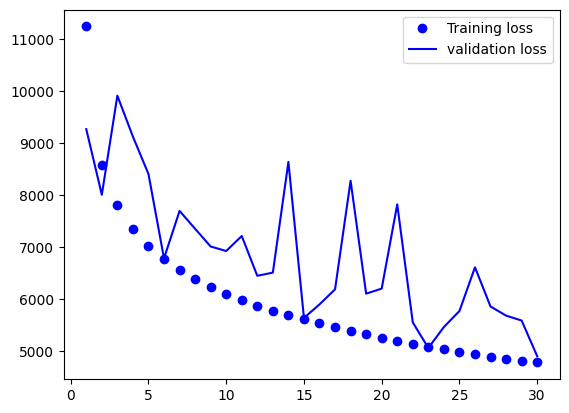

In [68]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1 )
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.legend()
plt.show()

In [69]:
# 눈으로 확인
iter = 0
error_sum = 0
for value in Test_Y:
    
    # 에러가 음수 일 경우 양수로 변경
    error = prediction[iter] - value
    if error < 0:
        error = error * -1
    
    # 예측 값, 정답, 오차 출력
    print(f" {iter + 1:<3} 예측: {prediction[iter][0]/10000:<5.2f}억,   정답: {value/10000:<5.2f}억,   오차: {error[0]/10000:.2f}억")

    # 에러 합계 구하기
    error_sum += error
    
    # 1증가
    iter += 1
    
    # 50에 멈추고, 에러 평균 출력
    if iter == 50:
        
        print(f'에러 평균: {error_sum[0]/50/10000:.2f}억원')
        break

 1   예측: 2.00 억,   정답: 1.89 억,   오차: 0.11억
 2   예측: 9.27 억,   정답: 6.63 억,   오차: 2.64억
 3   예측: 2.10 억,   정답: 1.80 억,   오차: 0.30억
 4   예측: 1.72 억,   정답: 1.40 억,   오차: 0.32억
 5   예측: 6.28 억,   정답: 4.67 억,   오차: 1.61억
 6   예측: 8.13 억,   정답: 6.40 억,   오차: 1.73억
 7   예측: 3.74 억,   정답: 2.35 억,   오차: 1.39억
 8   예측: 6.46 억,   정답: 4.25 억,   오차: 2.21억
 9   예측: 4.49 억,   정답: 3.97 억,   오차: 0.52억
 10  예측: 9.42 억,   정답: 9.00 억,   오차: 0.42억
 11  예측: 0.83 억,   정답: 0.68 억,   오차: 0.15억
 12  예측: 7.78 억,   정답: 5.95 억,   오차: 1.83억
 13  예측: 4.61 억,   정답: 2.89 억,   오차: 1.72억
 14  예측: 6.45 억,   정답: 4.20 억,   오차: 2.25억
 15  예측: 2.29 억,   정답: 2.09 억,   오차: 0.20억
 16  예측: 4.45 억,   정답: 3.60 억,   오차: 0.85억
 17  예측: 1.86 억,   정답: 1.53 억,   오차: 0.33억
 18  예측: 11.24억,   정답: 13.22억,   오차: 1.98억
 19  예측: 11.57억,   정답: 7.10 억,   오차: 4.47억
 20  예측: 3.19 억,   정답: 1.83 억,   오차: 1.36억
 21  예측: 6.98 억,   정답: 4.10 억,   오차: 2.88억
 22  예측: 1.50 억,   정답: 0.90 억,   오차: 0.60억
 23  예측: 2.69 억,   정답: 2.75 억,   오차: 0.06억
 24  예측: 4.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.layers import Input

# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()

# instantiate a distribution strategy
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

# instantiating the model in the strategy scope creates the model on the TPU
with tpu_strategy.scope():
    model_dense = keras.Sequential([
        Input(shape=(Train_X.shape[1],)), 
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1)
    ])

    model_dense.compile(optimizer="rmsprop",
                  loss="mae",
                  metrics=["mae", "accuracy"])

    history = model_dense.fit(Train_X, 
                              Train_Y,
                              epochs=10,
                              batch_size=64,
                              validation_data=(Test_X, Test_Y)
                             )

In [ ]:
# 트리 기반 앙상블 모델 사용
from sklearn import base
from feature_engine.encoding import OneHotEncoder as OHE
from sklearn.impute import SimpleImputer as SI

from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGB
from lightgbm import LGBMRegressor as LGB
from sklearn.metrics import mean_absolute_error as MAE # 평가지표

In [ ]:
# 더미화, 인스턴스
dummy_model = OHE(variables=['floor_level'], drop_last=False) # 층 레벨 범주형 변수 더미화

# 학습
dummy_model.fit(Train_X)

# 적용
Train_X = dummy_model.transform(Train_X)
Test_X = dummy_model.transform(Test_X)

In [ ]:
# 인스턴스, 결측치 채우기 : 결측치가 있는 컬럼은 연속형 -> 평균으로
imputer = SI().fit(Train_X) # default : 평균값으로 결측치를 채운다.

# 결측치 채우기
Train_X = pd.DataFrame(imputer.transform(Train_X), columns=Train_X.columns) # imputer 반환은 array값이기에 다시 DataFrame으로
Test_X = pd.DataFrame(imputer.transform(Test_X), columns=Test_X.columns)

In [ ]:
model_parameter_dict = dict()

RFR_param_grid = ParameterGrid({
                                'max_depth':[3, 4, 5],
                                'n_estimators':[100, 200]
})
XL_param_grid = ParameterGrid({
                                'max_depth':[3, 4, 5],
                                'n_estimators':[100, 200],
                                'learning_rate':[0.05, 0.1, 1.5, 0.2]
})

model_parameter_dict[RFR] = RFR_param_grid
model_parameter_dict[XGB] = XL_param_grid
model_parameter_dict[LGB] = XL_param_grid

In [ ]:
# max iter 계산 : 모델/파라미터별로 모든 iter = 216
max_iter_num = 0
for k in range(20, 4, -5): # 특성 개수 선택
    for m in model_parameter_dict.keys(): # 모델별
        for p in model_parameter_dict[m]:
            max_iter_num += 1

max_iter_num

- 모델 학습 진행

In [ ]:
best_score = 1e9
iteration_num = 0

for k in range(20, 4, -5):
    selector = SelectKBest(mutual_info_regression, k=k).fit(Train_X, Train_Y) # mutual_info_regression : 상호 통계량
    s_Train_X = selector.transform(Train_X)
    s_Test_X = selector.transform(Test_X)

    for model_func in model_parameter_dict.keys():
        for param in model_parameter_dict[model_func]:
            model = model_func(**param).fit(s_Train_X, Train_Y) # Light GBM은 DataFrame의 컬럼 이름에 대한 제약이 있어, ndarray를 입력으로 사용
            pred = model.predict(s_Test_X)
            score = MAE(Test_Y, pred)

            if score < best_score:
                print(f'k: {k}, model_func: {model_func}, parameter: {param}, score: {score}')
                best_score = score
                best_model_func = model_func
                best_param = param
                best_selector = selector
            
            iteration_num += 1

            print(f'iter num: {iteration_num}/{max_iter_num}, score: {score:.3f}, best score: {best_score:.3f}')


In [ ]:
final_X = pd.concat([Train_X, Test_X], axis=0, ignore_index=True)
final_Y = pd.concat([Train_Y, Test_Y], axis=0, ignore_index=True)

final_model = best_model_func(**best_param).fit(best_selector.transform(final_X), final_Y)

### 파이프라인 구축

In [ ]:
def pipeline(new_data, ref_df, model, selector, mean_price_per_gu, num_park_per_dong, num_facilty_per_dong, aggregated_day_care_center_df, imputer, dummy_model):
    ## 변수 변환 및 부착
    new_data['dong'] = new_data['dong'].str.split(' ', expand = True).iloc[:, 0] # dong에 리가 붙어있으면 제거
    
    new_data = pd.merge(new_data, ref_df, left_on = ['city', 'dong'], right_on = ['시도', '법정동']) # 시군구 부착 
    
    new_data.drop(['시도', '법정동', 'transaction_id', 'addr_kr'], axis = 1, inplace = True) # 불필요한 변수 제거
    
    # age 변수 부착
    new_data['age'] = 2018 - new_data['year_of_completion']
    new_data.drop('year_of_completion', axis = 1, inplace = True)    
    
    # 거래 년월 부착
    new_data['transaction_year_month'] = new_data['transaction_year_month'].astype(str)
    new_data['transaction_year'] = new_data['transaction_year_month'].str[:4].astype(int)
    new_data['transaction_month'] = new_data['transaction_year_month'].str[4:].astype(int)
    new_data.drop('transaction_year_month', axis = 1, inplace = True)   

    # Seoul 생성
    new_data['Seoul'] = (new_data['city'] == "서울특별시").astype(int)    
    
    # floor_level 변수 생성
    new_data['floor_level'] = new_data['floor'].apply(floor_level_converter)
    new_data.drop('floor', axis = 1, inplace = True)    
    
    # 시세 관련 변수 추가
    new_data = pd.merge(new_data, mean_price_per_gu, on = ['city', '시군구'])
    new_data = pd.merge(new_data, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left')
    new_data['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행
           
    new_data = pd.merge(new_data, price_per_aid, on = ['apartment_id'], how = 'left')
    
    
    # 공원 데이터 부착
    new_data = pd.merge(new_data, num_park_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
    new_data['공원수'].fillna(0, inplace = True)
    new_data.drop('gu', axis = 1, inplace = True)

    new_data = pd.merge(new_data, num_facilty_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
    
    facility_cols = ['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other']
    new_data[facility_cols].fillna(0, inplace = True)
    new_data.drop('gu', axis = 1, inplace = True)    
    
    # 어린이집 데이터 부착
    new_data = pd.merge(new_data, aggregated_day_care_center_df, left_on = ['city', '시군구'], right_on = ['city', 'gu'], how = 'left')
    new_data[aggregated_day_care_center_df.columns].fillna(0, inplace = True)
    new_data.drop('gu', axis = 1, inplace = True)
    
    # 특징 추출 ('transaction_real_price'는 drop 대상에서 제외)
    X = new_data.drop(['apartment_id', 'city', 'dong', 'jibun', 'apt', 'transaction_date', '시군구', 'transaction_year', 'transaction_month'], axis = 1)
    
    # 더미화
    X = dummy_model.transform(X)
    
    # 결측 대체
    X = imputer.transform(X)
            
    # 특징 선택
    X = selector.transform(X)
    
    return model.predict(X)

- 피클 사용하여 저장 및 불러오기

In [ ]:
pipeline_element = {"ref_df": ref_df,
                   "model":final_model,
                   "selector":best_selector,
                   "mean_price_per_gu":mean_price_pre_gu,
                   "num_park_per_dong":num_park_per_dong,
                   "num_facilty_per_dong":num_facility_per_dong,
                   "aggregated_day_care_center_df":aggregated_day_care_center_df,
                   "imputer":imputer,
                   "dummy_model":dummy_model,
                   "pipeline":pipeline}

import pickle
with open("아파트실거래가예측모델.pckl", "wb") as f:
    pickle.dump(pipeline_element, f)

In [ ]:
with open("아파트실거래가예측모델.pckl", "rb") as f:
    pipeline_element = pickle.load(f)

ref_df = pipeline_element["ref_df"]
model = pipeline_element["model"]
selector = pipeline_element["selector"]                 
mean_price_per_gu = pipeline_element["mean_price_per_gu"]
num_park_per_dong = pipeline_element["num_park_per_dong"]
num_facilty_per_dong = pipeline_element["num_facilty_per_dong"]
aggregated_day_care_center_df = pipeline_element["aggregated_day_care_center_df"]
imputer = pipeline_element["imputer"]
dummy_model = pipeline_element["dummy_model"]
pipeline = pipeline_element["pipeline"]

In [ ]:
test_df.head()

In [ ]:
output = pipeline(test_df, ref_df, model, selector, mean_price_per_gu, num_park_per_dong, num_facilty_per_dong, aggregated_day_care_center_df, imputer, dummy_model)
result = pd.Series(output, index = test_df['transaction_id'])

In [ ]:
result = pd.DataFrame({'transaction_id':result.index, 'pred':result.values})
result